<a href="https://colab.research.google.com/github/FranciscoMedellin/mna-computer-vision/blob/main/Equipo_33_Simple_ImgProcessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Maestría en inteligencia Artificial Aplicada.**##



**TC4033.10 Visión Computacional para imágenes y video**

*2.2_image_enhancement*




Equipo #33

Jonathan Alberto López Rodríguez - A01794938

Francisco Medellin Zertuche - A01794044

Edgar Rusef Hernández García - A01795076

# 1. Simple Image Operations

## Table of Contents
1. [Libraries](#libraries)
2. [Loading Images](#loading)
3. [Resizing Images](#resize)
4. [Negative Images](#negative)
5. [Logarithmic Transformation](#log)
6. [Image Binarizer](#bin)
7. [Image Quantizer](#quant)

**8. [Actividad 2.2 Google Colab - Simple_ImgProcessing](#Actividad.2.2)**

Equipo 33

- Jonathan Alberto López Rodríguez - A01794938
- Francisco Medellin Zertuche - A01794044


## Importing Libraries <a class="anchor" id="libraries" ></a>

In [ ]:
from matplotlib import image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2

## Loading Images <a class="anchor" id="loading"></a>

<class 'numpy.ndarray'>


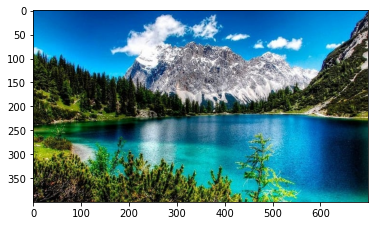

In [ ]:
img1 = mpimg.imread('data/image.jpg')
plt.imshow(img1)
print(type(img1))

Look at the shape of this array:

In [ ]:
img1.shape

(400, 700, 3)

The image is actually composed of three "layers, or *channels*, for red, green, and blue (RGB) pixel intensities.

Display the same image but this time we'll use another popular Python library for working with images - **cv2**.

numpy.ndarray

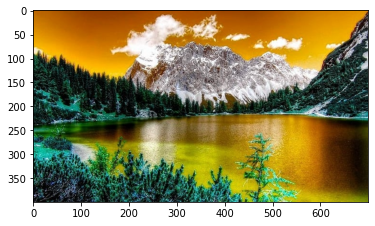

In [ ]:
img2 = cv2.imread('data/image.jpg')
plt.imshow(img2)
type(img2)

The trouble is that cv2 loads the array of image data with the channels ordered as blue, green, red (BGR) instead of red, green blue (RGB).

Let's fix that

AxesImage(54,36;334.8x217.44)


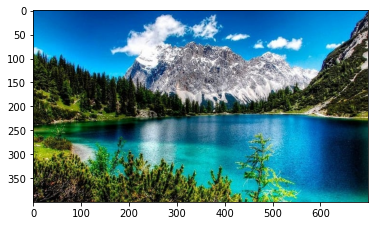

In [ ]:
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
print(plt.imshow(img2))

Lastly, one more commonly used library for image processing in Python we should consider - **PIL**:

<class 'PIL.JpegImagePlugin.JpegImageFile'>


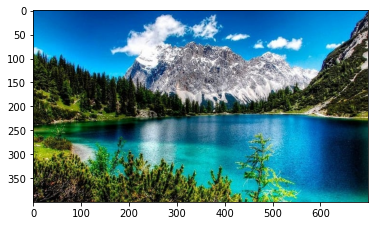

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

img3 = Image.open('data/image.jpg')
plt.imshow(img3)
print(type(img3))

It's easy to convert a PIL JpegImageFile to a numpy array

In [ ]:
img3 = np.array(img3)
img3.shape

(400, 700, 3)

Saving a numpy array in an optimized format, should you need to persist images into storage

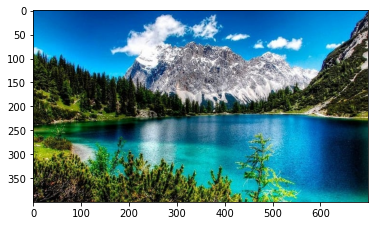

In [ ]:
# Save the image
np.save('data/img.npy', img3)

# Load the image
img3 = np.load('data/img.npy')

plt.imshow(img3)

## Resizing an Image <a class="anchor" id="resize"></a>
One of the most common manipulations of an image is to resize it.

Generally, we want to ensure that all of your training images have consistent dimensions.

Original size: 700 x 400
New size: 200 x 200


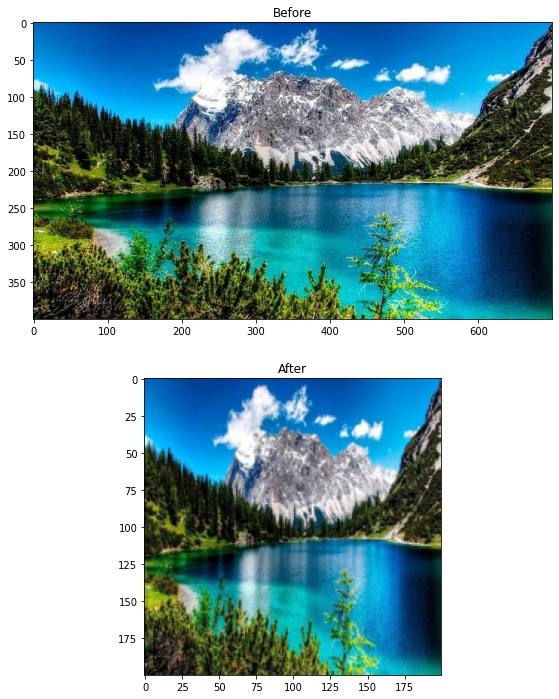

In [ ]:
from PIL import Image, ImageOps

# Load the image array into a PIL Image
orig_img = Image.fromarray(img3)

# Get the image size
o_h, o_w = orig_img.size
print('Original size:', o_h, 'x', o_w)

# We'll resize this so it's 200 x 200
target_size = (200,200)
new_img = orig_img.resize(target_size)
n_h, n_w = new_img.size
print('New size:', n_h, 'x', n_w)

# Show the original and resized images
# Create a figure
fig = plt.figure(figsize=(12, 12))

# Subplot for original image
a=fig.add_subplot(2,1,1)
imgplot = plt.imshow(orig_img)
a.set_title('Before')

# Subplot for resized image
a=fig.add_subplot(2,1,2)
imgplot = plt.imshow(new_img)
a.set_title('After')

plt.show()


If we want to resize the image and change its shape without distorting it, we'll need to *scale* the image so that its largest dimension fits our new desired size.

Original size: 700 x 400
Scaled size: 200 x 114
New size: 200 x 200


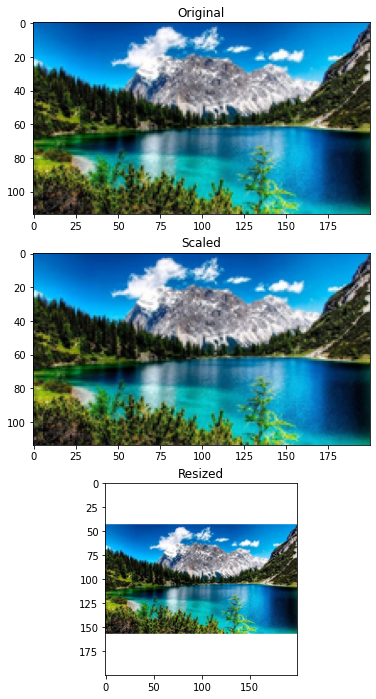

In [ ]:
# Get the image size
orig_height, orig_width = orig_img.size
print('Original size:', orig_height, 'x', orig_width)

# We'll resize this so it's 200 x 200
target_size = (200,200)

# Scale the image to the new size using the thumbnail method
scaled_img = orig_img
scaled_img.thumbnail(target_size, Image.ANTIALIAS)
scaled_height, scaled_width = scaled_img.size
print('Scaled size:', scaled_height, 'x', scaled_width)

# Create a new white image of the target size to be the background
new_img = Image.new("RGB", target_size, (255, 255, 255))

# paste the scaled image into the center of the white background image
new_img.paste(scaled_img, (int((target_size[0] - scaled_img.size[0]) / 2), int((target_size[1] - scaled_img.size[1]) / 2)))
new_height, new_width = new_img.size
print('New size:', new_height, 'x', new_width)

# Show the original and resized images
# Create a figure
fig = plt.figure(figsize=(12, 12))

# Subplot for original image
a=fig.add_subplot(3,1,1)
imgplot = plt.imshow(orig_img)
a.set_title('Original')

# Subplot for scaled image
a=fig.add_subplot(3,1,2)
imgplot = plt.imshow(scaled_img)
a.set_title('Scaled')

# Subplot for resized image
a=fig.add_subplot(3,1,3)
imgplot = plt.imshow(new_img)
a.set_title('Resized')

plt.show()

## Negative Images <a class="anchor" id="negative"></a>

In [ ]:
orig_img = cv2.imread('data/image.jpg')
orig_img = cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB)
img_neg = 255 - orig_img

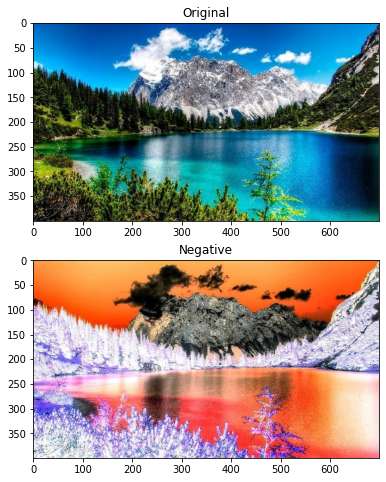

In [ ]:
fig = plt.figure(figsize=(8, 8))

# Subplot for original image
a=fig.add_subplot(2,1,1)
imgplot = plt.imshow(orig_img)
a.set_title('Original')

a = fig.add_subplot(2,1,2)
imgplot = plt.imshow(img_neg)
a.set_title('Negative')

plt.show()

## Logarithmic Transformation <a class="anchor" id="log"></a>

$$
S = c * log (1 + r)
$$

where,
- $R$ = input pixel value
- $C$ = scaling constant and
- $S$ = output pixel value

The value of $c$ is chosen such that we get the maximum output value corresponding to the bit size used. So, the formula for calculating $c$  is as follows:

$c = 255 / (log (1 + $ max input pixel value $))$

In [ ]:
orig_img = cv2.imread('data/image.jpg')
orig_img = cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB)

# Apply log transformation method
c = 255 / np.log(1 + np.max(orig_img))
log_img = c * (np.log(orig_img + 1))

# Specify the data type so that
# float value will be converted to int
log_img = np.array(log_img, dtype = np.uint8)

C:\Users\ivanr\AppData\Local\Temp\ipykernel_14972\418958946.py:6: RuntimeWarning: divide by zero encountered in log
  log_img = c * (np.log(orig_img + 1))


Log transformation of gives actual information by enhancing the image. If we apply this method in an image having higher pixel values then it will enhance the image more and actual information of the image will be lost.

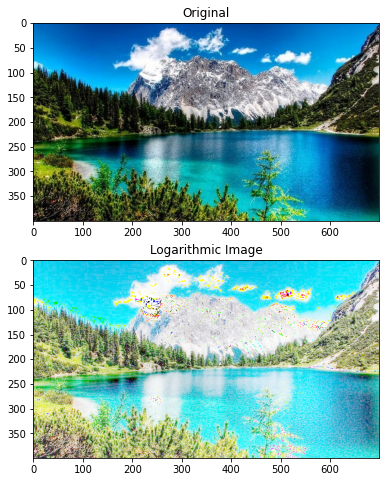

In [ ]:
fig = plt.figure(figsize=(8, 8))

# Subplot for original image
a=fig.add_subplot(2,1,1)
imgplot = plt.imshow(orig_img)
a.set_title('Original')

a = fig.add_subplot(2,1,2)
imgplot = plt.imshow(log_img)
a.set_title('Logarithmic Image')

plt.show()

## Image Binarizer (Thresholding) <a class="anchor" id="bin"></a>

Binarize pixels (set pixel values to 0 or 1) according to a threshold.

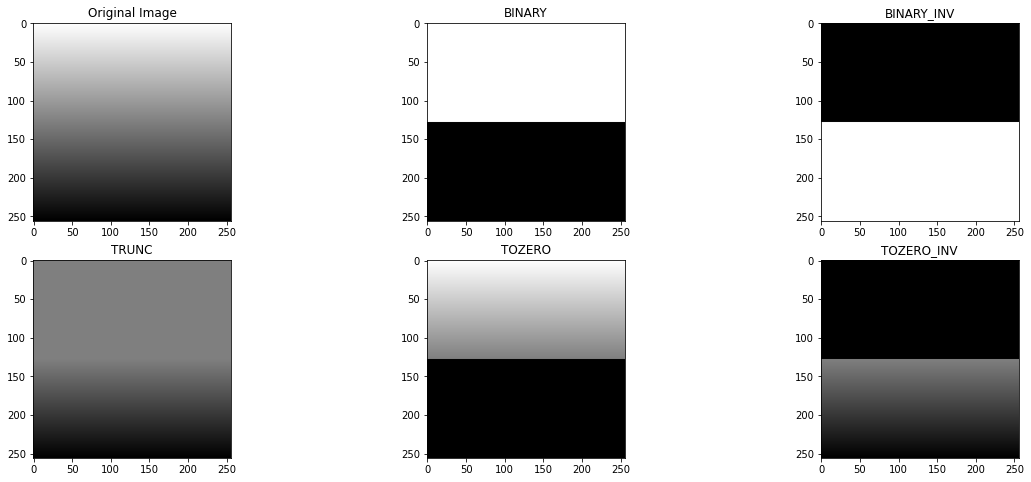

In [ ]:
orig_img = cv2.imread('data/linear_gradient.png')
orig_img = cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB)

ret,thresh1 = cv2.threshold(orig_img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(orig_img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(orig_img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(orig_img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(orig_img,127,255,cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [orig_img, thresh1, thresh2, thresh3, thresh4, thresh5]
n = np.arange(6)

fig = plt.figure(figsize=(20, 8))
for i in n:
  plt.subplot(2,3,i+1), plt.imshow(images[i],'gray')
  plt.title(titles[i])

plt.show()

## Image Quantizer  <a class="anchor" id="quant"></a>

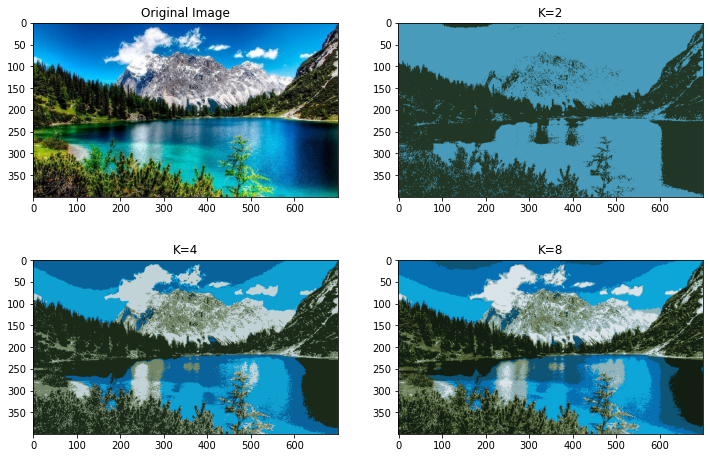

In [ ]:
orig_img = cv2.imread('data/image.jpg')

Z = orig_img.reshape((-1,3))

# convert to np.float32
Z = np.float32(Z)

# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
def colorQuant(Z, K, criteria):

   ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

   # Now convert back into uint8, and make original image
   center = np.uint8(center)
   res = center[label.flatten()]
   res2 = res.reshape((orig_img.shape))
   return res2
res1 = colorQuant(Z, 2, criteria)
res2 = colorQuant(Z, 5, criteria)
res3 = colorQuant(Z, 8, criteria)

fig = plt.figure(figsize=(12, 8))

plt.subplot(221),plt.imshow(cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(222),plt.imshow(cv2.cvtColor(res1, cv2.COLOR_BGR2RGB))
plt.title('K=2')

plt.subplot(223),plt.imshow(cv2.cvtColor(res2, cv2.COLOR_BGR2RGB))
plt.title('K=4')

plt.subplot(224),plt.imshow(cv2.cvtColor(res3, cv2.COLOR_BGR2RGB))
plt.title('K=8')

plt.show()

# Actividad 2.2 Google Colab - Simple_ImgProcessing <a class="anchor" id="Actividad.2.2" ></a>


Para esta actividad se requiere:

Ingresar a Canvas y descargar el proyecto en Notebook Download Notebook.
Revisar los ejercicios propuestos antes de codificar e identificar las secciones de libro o de las diapositivas que te puedan servir como soporte.
El proyecto con el Google Collab modificado y las respuestas a los ejercicios se deben convertir en PDF y también en archivo comprimido y entregarse vía Canvas.

Bibliografia:

Importamos librerias y cargamos una imagen de prueba

In [ ]:
import cv2
import numpy as np
import urllib.request

AxesImage(shape=(359, 800, 3))


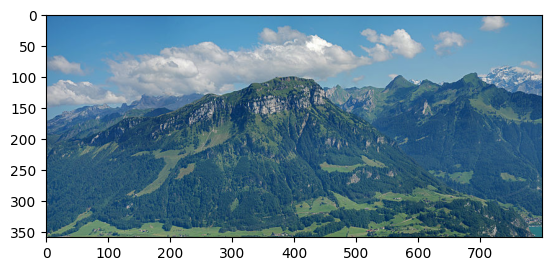

In [ ]:
url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/3/3f/Fronalpstock_big.jpg/800px-Fronalpstock_big.jpg'
resp = urllib.request.urlopen(url)
image = np.asarray(bytearray(resp.read()), dtype="uint8")

orig_img = cv2.imdecode(image, cv2.IMREAD_COLOR)
img = cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB)

print(plt.imshow(img))

##  Transformaciones pixel a pixel

1. Brightness adjustment

Adjusting the brightness of an image is a common technique to simulate different lighting conditions.

In [ ]:
def brightness_adjustment(img, value):
  hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) # Convert to HSV to adjuts more easy the brigthness
  h, s, v = cv2.split(hsv)

  lim = 255 - value
  v[v > lim] = 255
  v[v <= lim] += value

  final_hsv = cv2.merge((h, s, v))
  img_brightness = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
  return img_brightness

AxesImage(shape=(359, 800, 3))


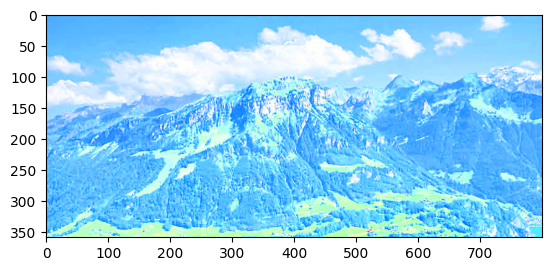

In [ ]:
print(plt.imshow(brightness_adjustment(img, 180))) # Set the image and brightness value

2. Image Inversion (Negative)

Creating the negative of an image involves reversing all colors, example, black becomes white, and vice versa. This is  useful for highlighting different features within the image that may not be as visible in the original. The negative of the image can help in pattern recognition and other tasks where differentiating between features.

In [ ]:
def inversion_img(img):
    """ Return negative of the image. """
    negative = cv2.bitwise_not(img)
    return negative

AxesImage(shape=(359, 800, 3))


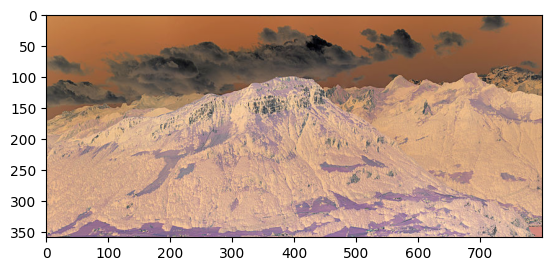

In [ ]:
print(plt.imshow(inversion_img(img)))

3. Contrast Adjustment

Adjusting the contrast of an image can make the features more distinguishable, especially under conditions of overexposure or underexposure.

This is done by scaling the intensity of the pixels. A contrast factor greater than one increases contrast, making dark regions darker and bright regions brighter.

In [ ]:
def contrast_adjustment(img, alpha):
    """ Adjuts contract of the input image. Alpha > 1 incrase contrast, 0 < Alpha < 1 decrease it. """
    new_contrarst = cv2.convertScaleAbs(img, alpha=alpha)
    return new_contrarst

AxesImage(shape=(359, 800, 3))


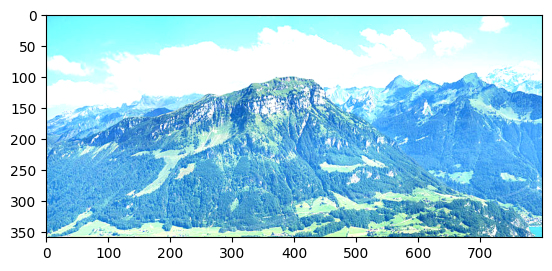

In [ ]:
print(plt.imshow(contrast_adjustment(img,2)))

## Aplicación del negativo de una imagen

Investiga una aplicación donde obtener el negativo de imagen tenga un valor específico e integra el código en en una fila de google collab, justificar brevemente tu investigación y haciendo una demo sencilla.

The negative of an image is particularly useful in the field of medical image processing, especially with X-rays and other diagnostic imaging types. This technique can help highlight subtle details that might be overlooked in a normal image. For example, in X-ray images, the negative can make bone fractures and other abnormalities more visible for more effective diagnosis.

<br>
References:

[Pneumonia Detection in X-rays Using OpenCV and Deep Learning](https://www.researchgate.net/publication/353859443_Pneumonia_Detection_in_X-rays_Using_OpenCV_and_Deep_Learning)

[Detecting COVID-19 in X-ray images with Keras, TensorFlow, and Deep Learning](https://pyimagesearch.com/2020/03/16/detecting-covid-19-in-x-ray-images-with-keras-tensorflow-and-deep-learning/)

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import urllib.request

In [ ]:
url = "https://raw.githubusercontent.com/FranciscoMedellin/mna-computer-vision/refs/heads/main/x-ray.jpg"
resp = urllib.request.urlopen(url)
image = np.asarray(bytearray(resp.read()), dtype="uint8")
orig_img = cv2.imdecode(image, cv2.IMREAD_COLOR)
img = cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB)
# print(plt.imshow(img))

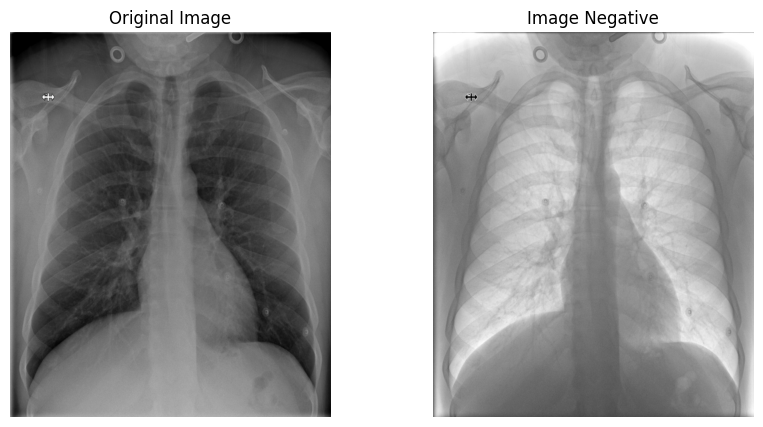

In [ ]:
# Function to convert an image to its negative
def image_negative(image):
    return cv2.bitwise_not(image)


negative_image = image_negative(img)

# Convert BGR to RGB for visualization
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
negative_image_rgb = cv2.cvtColor(negative_image, cv2.COLOR_BGR2RGB)

# Display the images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(negative_image_rgb)
plt.title('Image Negative')
plt.axis('off')

plt.show()


## Aplicación usando Gamma Correction

Investiga una aplicación donde se puede aplicar la corrección de gamma en una imagen. Integra el código en en una fila de google collab, justifica brevemente tu investigación y haz una demo sencilla.



Gamma correction is a widely used technique in image processing to adjust the luminance of images. It's particularly effective in enhancing the visibility of features in images that are either too dark or too light.

Gamma correction can be used to correct the brightness of an image by using a non linear transformation between the input values and the mapped output values.
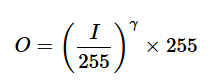

As this relation is non linear, the effect will not be the same for all the pixels and will depend to their original value.

<br>
References:

[OpenCV Official Docs, gamma outside environments and gamma correction](https://docs.opencv.org/3.4/d3/dc1/tutorial_basic_linear_transform.html)

This makes gamma correction an important tool in fields such as photography, video processing, **having a lot of applicaitons on external enviroments**, where it helps in enhancing the contrast of fine details in areas that are underexposed or overexposed by outside weather where we do not have control of the light or reflections.


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import urllib.request

AxesImage(shape=(376, 504, 3))


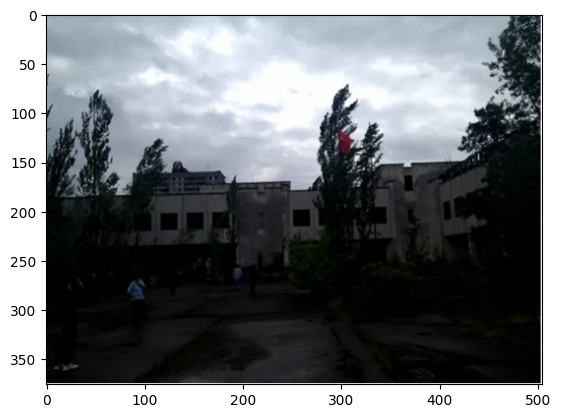

In [ ]:
url = "https://raw.githubusercontent.com/FranciscoMedellin/mna-computer-vision/refs/heads/main/gamma.png"
resp = urllib.request.urlopen(url)
image = np.asarray(bytearray(resp.read()), dtype="uint8")
orig_img = cv2.imdecode(image, cv2.IMREAD_COLOR)
img = cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB)
print(plt.imshow(img))

In [ ]:
def adjust_gamma(image, gamma=1.0):
    # Build a lookup table mapping the pixel values [0, 255] to
    # their adjusted gamma values
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255
      for i in np.arange(0, 256)]).astype("uint8")

    # Apply gamma correction using the lookup table
    return cv2.LUT(image, table)

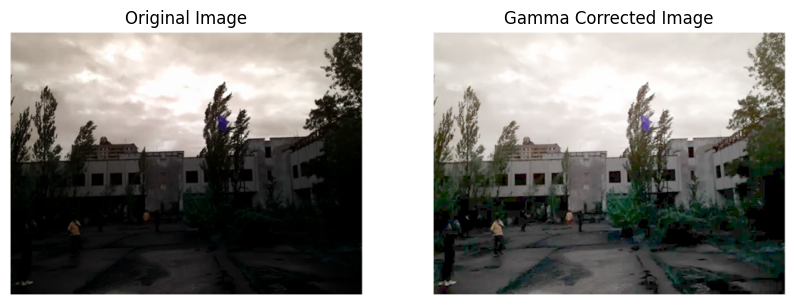

In [ ]:
# Load the image
original_image = img
gamma_corrected = adjust_gamma(original_image, gamma=2.2)  # Increase gamma to darken image

# Convert BGR to RGB for visualization
original_image_rgb = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
gamma_corrected_rgb = cv2.cvtColor(gamma_corrected, cv2.COLOR_BGR2RGB)

# Display the images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(original_image_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(gamma_corrected_rgb)
plt.title('Gamma Corrected Image')
plt.axis('off')

plt.show()


## Aplicación usando Sustracción de imágenes

Investiga una aplicación donde se puede usar la sustracción de imágenes e integra el código en en una fila de google collab, justificar brevemente tu investigación, haciendo una demo sencilla.

Image subtraction is a valuable technique in various fields such as medical imaging, remote sensing, and motion detection. It involves subtracting one image from another to highlight differences between them.

In the context of remote sensing, image subtraction can help in detecting changes in land use or vegetation cover by comparing images taken at different times.

This thecnique has **applications on detecting objects**, imagine that we want to detect the objects on a similar background, we can apply substraction in order to hihgtligth just the objects.

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import urllib.request

AxesImage(shape=(227, 308, 3))


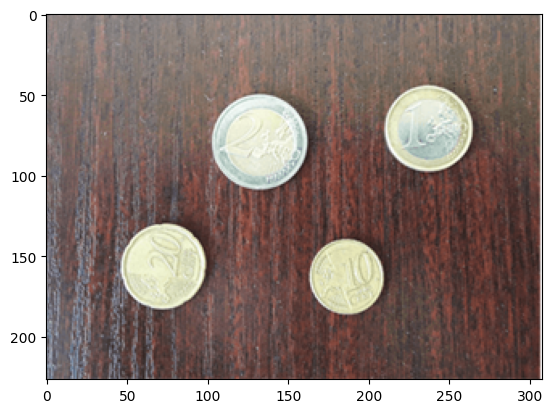

In [ ]:
url = "https://raw.githubusercontent.com/FranciscoMedellin/mna-computer-vision/refs/heads/main/coins.png"
resp = urllib.request.urlopen(url)
image = np.asarray(bytearray(resp.read()), dtype="uint8")
orig_img = cv2.imdecode(image, cv2.IMREAD_COLOR)
img = cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB)
print(plt.imshow(img))

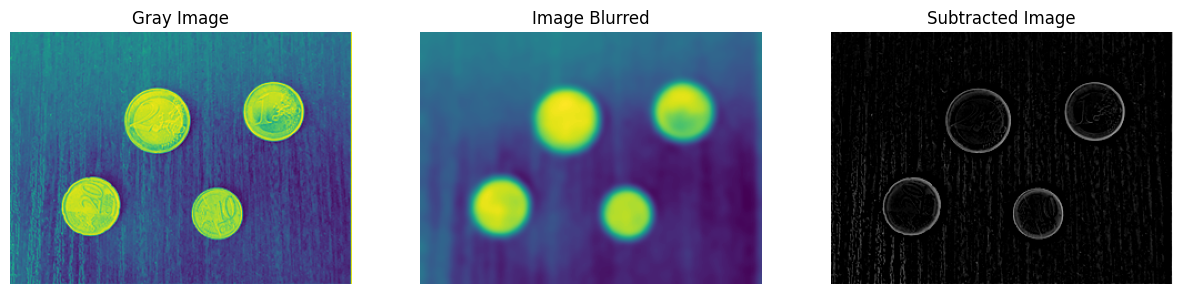

In [ ]:
# Convertir a escala de grises
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# Aplicar un desenfoque gaussiano
blurred = cv2.GaussianBlur(gray, (21, 21), 0)

# Restar el desenfoque de la imagen original en escala de grises
highlighted = cv2.subtract(gray, blurred)

# Display the images
plt.figure(figsize=(15, 10))
plt.subplot(1, 3, 1)
plt.imshow(gray)
plt.title('Gray Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(blurred)
plt.title('Image Blurred')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(highlighted, cmap='gray')
plt.title('Subtracted Image')
plt.axis('off')

plt.show()
